# **California Housing Prices - Clustering K-Means**

## **Business Goal:** By grouping neighborhoods according to different characteristics included in the dataset, this project aims to obtain insights into the California housing market. To help real estate stakeholders, urban planners, and policymakers make decisions, the main goal is to identify trends and commonalities among neighborhoods. By identifying distinct neighborhoods with comparable housing characteristics, clustering can yield important insights for resource allocation, investment strategies, and targeted interventions.

## The dataset comprises essential features such as longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, median house value, and ocean proximity. Each row in the dataset represents a specific neighborhood in California.
## **Dataset link:** https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [1]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset (make sure you've uploaded the file to your Colab session first)
file_path = 'housing.csv'  # Adjust the path if your file is in a specific directory
data = pd.read_csv(file_path)

# Impute missing values in 'total_bedrooms' with the median
imputer = SimpleImputer(strategy='median')
data['total_bedrooms'] = imputer.fit_transform(data[['total_bedrooms']])

# Encode 'ocean_proximity' using one-hot encoding
encoder = OneHotEncoder(sparse=False)
ocean_proximity_encoded = encoder.fit_transform(data[['ocean_proximity']])
ocean_proximity_encoded_df = pd.DataFrame(ocean_proximity_encoded, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Drop the original 'ocean_proximity' column and concatenate the new one-hot encoded columns
data_prepared = data.drop('ocean_proximity', axis=1)
data_prepared = pd.concat([data_prepared, ocean_proximity_encoded_df], axis=1)

# Display the first few rows of the prepared dataset
print(data_prepared.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1   

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
housing_data = pd.read_csv(file_path)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#**Performing One-Hot Encoding:**
## One-hot encoding is a process used to convert categorical data variables into a form that could be provided to machine learning algorithms to do a better job in prediction.

In [4]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data' is the DataFrame and 'ocean_proximity' is the categorical column
encoder = OneHotEncoder(sparse=False)
ocean_proximity_encoded = encoder.fit_transform(data[['ocean_proximity']])
ocean_proximity_encoded_df = pd.DataFrame(ocean_proximity_encoded, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Concatenate the new one-hot encoded columns to the original DataFrame
data_prepared = pd.concat([data.drop('ocean_proximity', axis=1), ocean_proximity_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", data_prepared.shape)

# Display the column names
print("Column names:", data_prepared.columns.tolist())

# Display statistics for the one-hot encoded columns only
print(data_prepared.loc[:, data_prepared.columns.str.startswith('ocean_proximity')].describe())

Shape of the DataFrame: (20640, 14)
Column names: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
count               20640.000000            20640.000000   
mean                    0.442636                0.317393   
std                     0.496710                0.465473   
min                     0.000000                0.000000   
25%                     0.000000                0.000000   
50%                     0.000000                0.000000   
75%                     1.000000                1.000000   
max                     1.000000                1.000000   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
count            20640.000000              20640.000000   
mean

# **Performing K-Means Clustering using Pytorch Algorithm:**

## **Step 1: Data Preparation**

In [6]:
import torch
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for clustering
features = data_prepared.drop(columns=[col for col in data_prepared if col.startswith('ocean_proximity')])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert features to PyTorch tensor
features_tensor = torch.tensor(features_scaled, dtype=torch.float)

## **Step 2: K-Means Algorithm Implementation**

In [7]:
def k_means_pytorch(X, n_clusters=3, n_iters=100):
    # Randomly initializing cluster centers
    indices = torch.randperm(X.size(0))[:n_clusters]
    centroids = X[indices]

    for _ in range(n_iters):
        # Assign clusters
        distances = torch.cdist(X, centroids)
        labels = torch.argmin(distances, dim=1)

        # Update centroids
        centroids = torch.stack([X[labels == k].mean(dim=0) for k in range(n_clusters)])

    return labels, centroids

## **Step 3: Clustering Execution**

In [8]:
n_clusters = 5  # Example number of clusters
labels, centroids = k_means_pytorch(features_tensor, n_clusters=n_clusters, n_iters=100)

# Optionally, attach the cluster labels back to your DataFrame to analyze the clusters
data_prepared['cluster'] = labels.numpy()
print(data_prepared.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1   

## To visualize the clustering results with a scatter plot, especially for a dataset with many features, we usually pick two or three features that are most relevant for visualization. For geographical data like the one we've been working with, using latitude and longitude for plotting makes a lot of sense, as it will allow us to see how the clusters are distributed geographically.

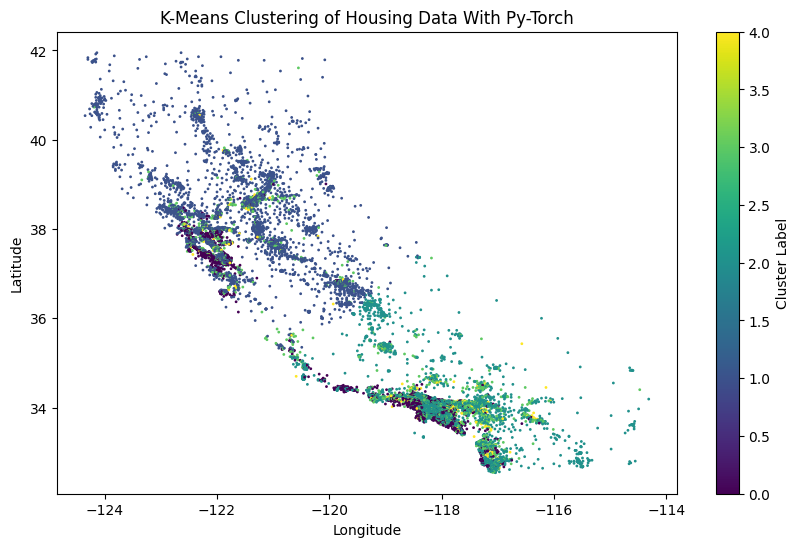

In [10]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_prepared['longitude'], data_prepared['latitude'], c=data_prepared['cluster'], cmap='viridis', s=1)
plt.colorbar(label='Cluster Label')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of Housing Data With Py-Torch')
plt.show()